<a href="https://colab.research.google.com/github/higordevellard/Machine_Learning_Advertisiment_Views/blob/main/machine_learning_anuncio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning em visualização de anúncios


## 1.Motivação

O objetivo deste projeto será desenvolver um modelo de machine learning capaz de prever se uma pessoa irá clicar em um determinado anúncio ou não, com base em dados disponíveis sobre o usuário e o anúncio em questão. Serão testados diversos algorítmos para determinar qual terá a melhor acurácia.


## 2.Pacotes Usados

In [11]:
# Configuração para não exibir os warnings dos pacotes selecionados
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #Transforma dados categórios em numérios
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


## 3.Carga do Dataset

O dataset escolhido para este projeto está disponível no UCI Machine Learning, conforme o seguinte endereço: https://archive.ics.uci.edu/ml/index.php.


In [2]:
# Localicazão do dataset
url_1 = 'https://raw.githubusercontent.com/higordevellard/Machine_Learning_Advertisiment_Views/main/advertising_dataset.csv'

# Labels dos atributos do dataset
labels_atributos = ['Tempo_no_site', 'Idade', 'Renda_media_regiao', 'Tempo_internet', 'Título_do_anuncio', 'Cidade', 'Masculino', 'País', 'Registro_tempo', 'Click_no_anúncio']

# Lê o arquivo 
dataset = pd.read_csv(url_1, names=labels_atributos, header=0, delimiter=',')


### **3.1.Informação sobre os datasets**

*   O dataset carregado faz parte de uma pesquisa feita durante uma campanha de marketing onde onde foi registrado se usuários de uma rede social mundialmente acessada clicaram ou não no anuncio que estava sendo patrocinado.

*   Os Atributos presentes no dataset, são:

**'Tempo_no_site'**: Tempo gasto pelo consumidor no site em minutos.

**'Idade'**: Idade do consumidor.

**'Renda_media_regiao'**: Média de renda referente à região geográfica.

**'Tempo_internet'**: Média do tempo gasto em minutos.

**'Título_do_anuncio'**: Título do anúncio.

**'Cidade'**: Cidade do consumidor.

**'Masculino'**: O consumidor é do sexo masculino?

**'País'**: País do consumidor.

**'Registro_tempo'**: Registro do tempo quando o consumidor clicou no 
anuncio ou fechou a janela.

**'Click_no_anúncio'**: 0 ou 1 indicando o click no anuncio.







## 4.Análise Exploratória de Dados

###4.1.Análise e Tratamento dos dados

In [3]:
# Mostra as dimensões do dataset (linhas e colunas)
dataset.shape

(1000, 10)

In [4]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tempo_no_site       1000 non-null   float64
 1   Idade               1000 non-null   int64  
 2   Renda_media_regiao  1000 non-null   float64
 3   Tempo_internet      1000 non-null   float64
 4   Título_do_anuncio   1000 non-null   object 
 5   Cidade              1000 non-null   object 
 6   Masculino           1000 non-null   int64  
 7   País                1000 non-null   object 
 8   Registro_tempo      1000 non-null   object 
 9   Click_no_anúncio    1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**Observações importantes levantadas após os resultados da função .info():** 

1)Todos os 10 atributos foram devidamente carregados.

2)Todas as 1000 Instâncias (linhas) são não nulas (Sem missings).



In [16]:
# Transformar os dados categóricos em numéricos.
label_encoder = LabelEncoder()
click_encoded = label_encoder.fit_transform(dataset['Click_no_anúncio'])

In [5]:
# Verificar a presença de linhas duplicadas no dataset.
print(dataset.duplicated().sum())

0


In [6]:
# Mostra as 10 primeiras linhas do dataset 
dataset.head(10)

,Tempo_no_site,Idade,Renda_media_regiao,Tempo_internet,Título_do_anuncio,Cidade,Masculino,País,Registro_tempo,Click_no_anúncio
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


### **4.2.Estatísticas Descritivas**

In [7]:
# Resumo estatístico do dataset.
dataset.drop(['Masculino', 'Click_no_anúncio'], axis=1).describe().round(2)


,Tempo_no_site,Idade,Renda_media_regiao,Tempo_internet
count,1000.00,1000.00,1000.00,1000.00
mean,65.00,36.01,55000.00,180.00
std,15.85,8.79,13414.63,43.90
min,32.60,19.00,13996.50,104.78
25%,51.36,29.00,47031.80,138.83
50%,68.22,35.00,57012.30,183.13
75%,78.55,42.00,65470.63,218.79
max,91.43,61.00,79484.80,269.96


Considerando os 1000 registros analisados, é apresentado os valores de (média, desvio padrão, mínimo, máximo e os quartis).

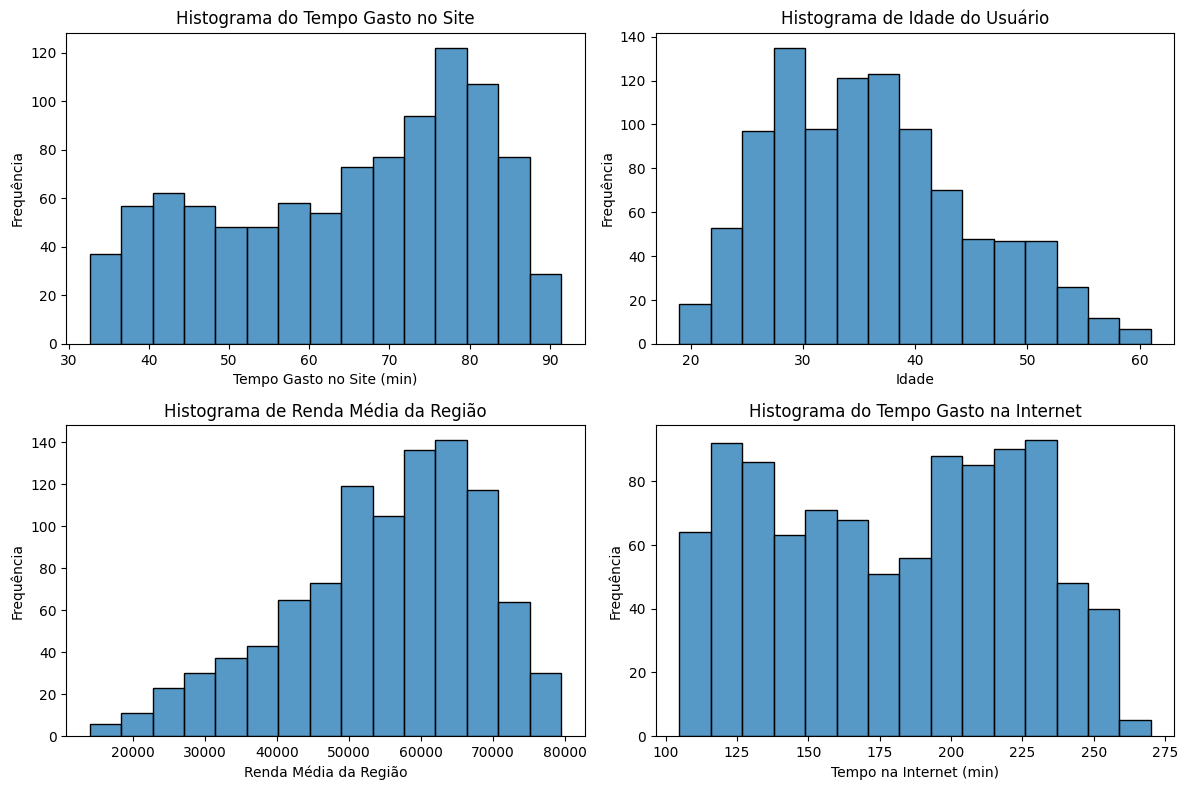

In [8]:
# Criar um subplot com duas linhas e duas colunas
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotar o histograma de Tempo_no_site
sns.histplot(dataset['Tempo_no_site'], kde=False, bins=15, ax=axs[0, 0])
axs[0, 0].set_xlabel("Tempo Gasto no Site (min)")
axs[0, 0].set_ylabel("Frequência")
axs[0, 0].set_title("Histograma do Tempo Gasto no Site")

# Plotar o histograma de Idade
sns.histplot(dataset['Idade'], kde=False, bins=15, ax=axs[0, 1])
axs[0, 1].set_xlabel("Idade")
axs[0, 1].set_ylabel("Frequência")
axs[0, 1].set_title("Histograma de Idade do Usuário")

# Plotar o histograma de Renda_media_regiao
sns.histplot(dataset['Renda_media_regiao'], kde=False, bins=15, ax=axs[1, 0])
axs[1, 0].set_xlabel("Renda Média da Região")
axs[1, 0].set_ylabel("Frequência")
axs[1, 0].set_title("Histograma de Renda Média da Região")

# Plotar o histograma de Tempo_internet
sns.histplot(dataset['Tempo_internet'], kde=False, bins=15, ax=axs[1, 1])
axs[1, 1].set_xlabel("Tempo na Internet (min)")
axs[1, 1].set_ylabel("Frequência")
axs[1, 1].set_title("Histograma do Tempo Gasto na Internet")

# Ajuste de layout
plt.tight_layout()

# Exibição dos histogramas
plt.show()

Pelo histograma apresentando, podemos perceber que o tempo médio gasto no site pelos usuários é cerca de 80 min por dia. A média da idade é cerca de 30 anos. Renda média geográfica em torno de 60.000 e tempo médio gasto na internet, cerca de 130 min.


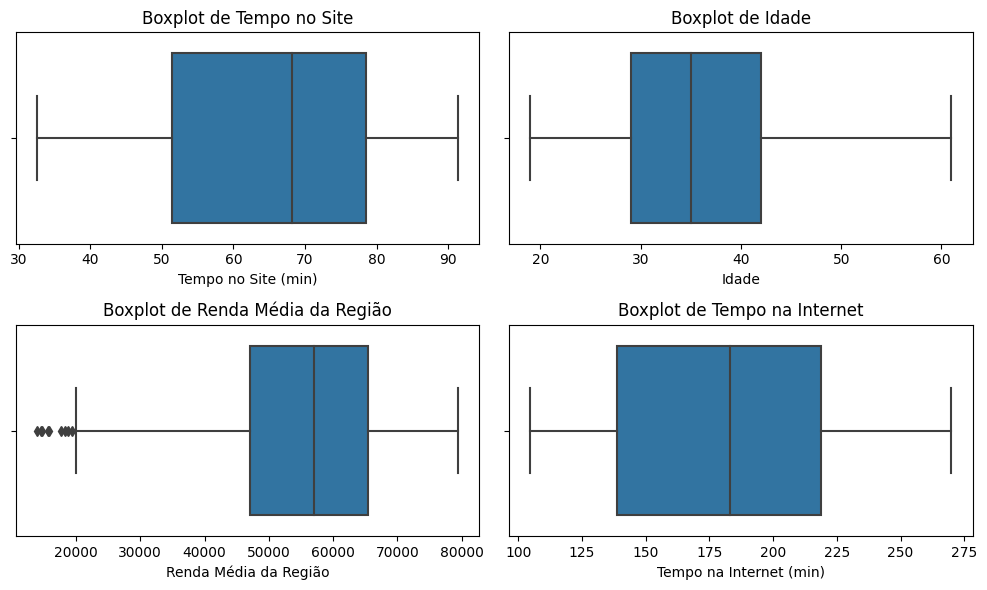

In [9]:
# Criar um subplot com duas linhas e duas colunas
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plotar o boxplot de Tempo_no_site
sns.boxplot(x="Tempo_no_site", data=dataset, ax=axs[0, 0])
axs[0, 0].set_title("Boxplot de Tempo no Site")
axs[0, 0].set_xlabel("Tempo no Site (min)")

# Plotar o boxplot de Idade
sns.boxplot(x="Idade", data=dataset, ax=axs[0, 1])
axs[0, 1].set_title("Boxplot de Idade")
axs[0, 1].set_xlabel("Idade")

# Plotar o boxplot de Renda_media_regiao
sns.boxplot(x="Renda_media_regiao", data=dataset, ax=axs[1, 0])
axs[1, 0].set_title("Boxplot de Renda Média da Região")
axs[1, 0].set_xlabel("Renda Média da Região")

# Plotar o boxplot de Tempo_internet
sns.boxplot(x="Tempo_internet", data=dataset, ax=axs[1, 1])
axs[1, 1].set_title("Boxplot de Tempo na Internet")
axs[1, 1].set_xlabel("Tempo na Internet (min)")

# Ajuste de layout
plt.tight_layout()

# Exibição dos boxplots
plt.show()

O Boxplot apresentado indica outliers apenas para a renda média da região, porém são apenas registros que foram computados em regioes geográficas onde a renda da população é considerada baixa. Geralmente associada a países subdesenvolvidos. 





# **5.Modelagem e Inferência**

## **5.1.Separação em conjunto de treino e conjunto de teste com holdout**

In [13]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:4]
y = click_encoded.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [17]:
# Conferindo se os dados de treino estão sendo extraídos da coluna certa.
print("Dados de treino:")
print(X_train)  # Exibir primeiras linhas dos atributos de treino
print(y_train)  # Exibir primeiras linhas dos rótulos de treino

Dados de treino:
[[57.51 38 47682.28 105.71]
 [55.79 24 59550.05 149.67]
 [72.8 35 63551.67 249.54]
 ...
 [67.28 43 76246.96 155.8]
 [46.89 48 72553.94 176.78]
 [44.33 41 43386.07 120.63]]
[1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0
 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0
 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 

## **5.2.Criação e avaliação de modelos: linha base**

LR: 0.901250 (0.038099)
KNN: 0.700000 (0.043301)
CART: 0.950000 (0.021651)
NB: 0.966250 (0.015861)
SVM: 0.707500 (0.045139)
Bagging: 0.957500 (0.024495)
RF: 0.957500 (0.026926)
ET: 0.960000 (0.019203)
Ada: 0.952500 (0.020767)
GB: 0.957500 (0.023184)
Voting: 0.932500 (0.036315)


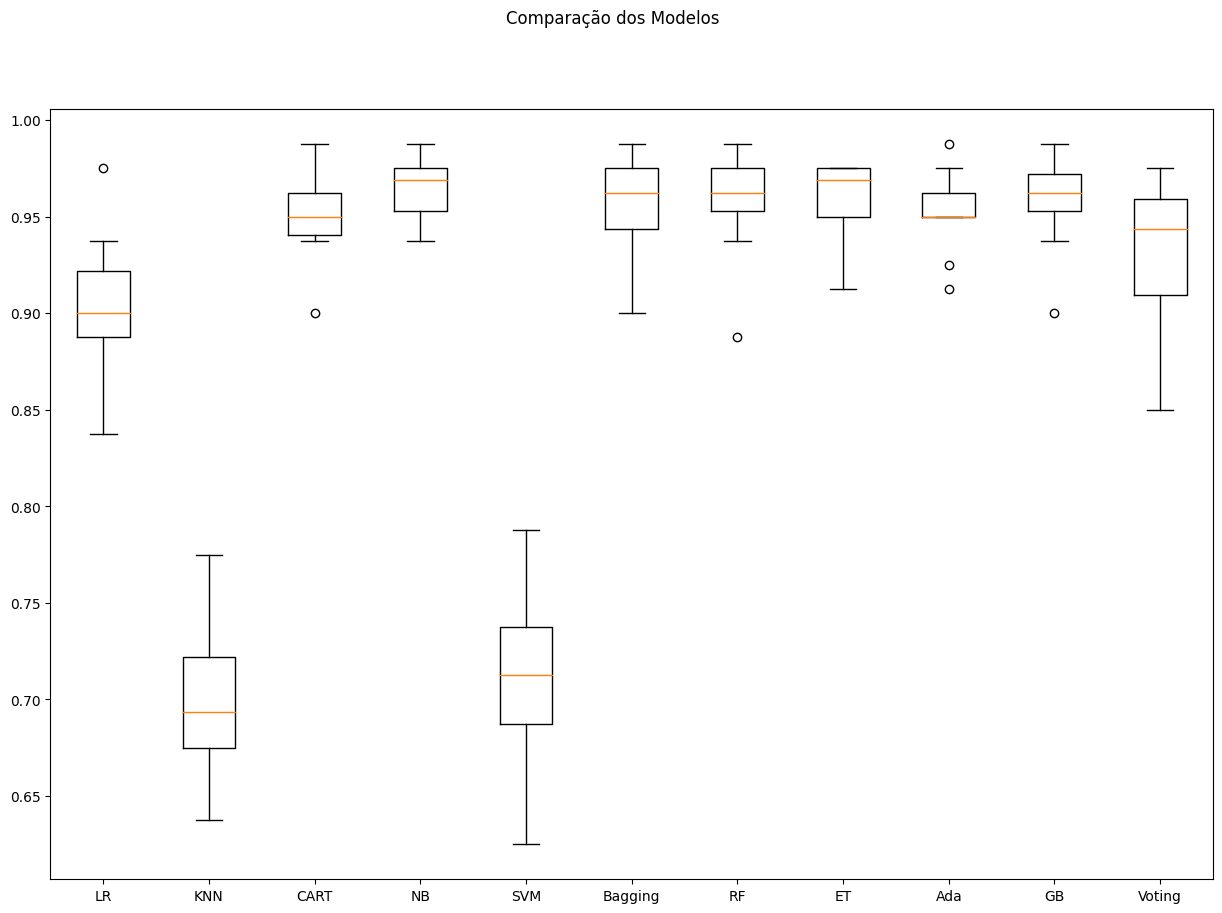

In [15]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

## **5.3.Criação e avaliação de modelos: dados padronizados e normalizados**



LR-orig: 0.901 (0.038)
KNN-orig: 0.700 (0.043)
CART-orig: 0.950 (0.022)
NB-orig: 0.966 (0.016)
SVM-orig: 0.708 (0.045)
Bag-orig: 0.958 (0.024)
RF-orig: 0.957 (0.027)
ET-orig: 0.960 (0.019)
Ada-orig: 0.953 (0.021)
GB-orig: 0.958 (0.023)
Vot-orig: 0.932 (0.036)
LR-padr: 0.970 (0.015)
KNN-padr: 0.971 (0.015)
CART-padr: 0.951 (0.023)
NB-padr: 0.966 (0.016)
SVM-padr: 0.971 (0.013)
Bag-padr: 0.956 (0.025)
RF-padr: 0.957 (0.029)
ET-padr: 0.959 (0.022)
Ada-padr: 0.953 (0.021)
GB-padr: 0.959 (0.022)
Vot-padr: 0.972 (0.013)
LR-norm: 0.965 (0.024)
KNN-norm: 0.969 (0.016)
CART-norm: 0.949 (0.023)
NB-norm: 0.966 (0.016)
SVM-norm: 0.966 (0.017)
Bag-norm: 0.958 (0.025)
RF-norm: 0.959 (0.027)
ET-norm: 0.957 (0.018)
Ada-norm: 0.953 (0.021)
GB-norm: 0.958 (0.023)
Vot-norm: 0.964 (0.022)


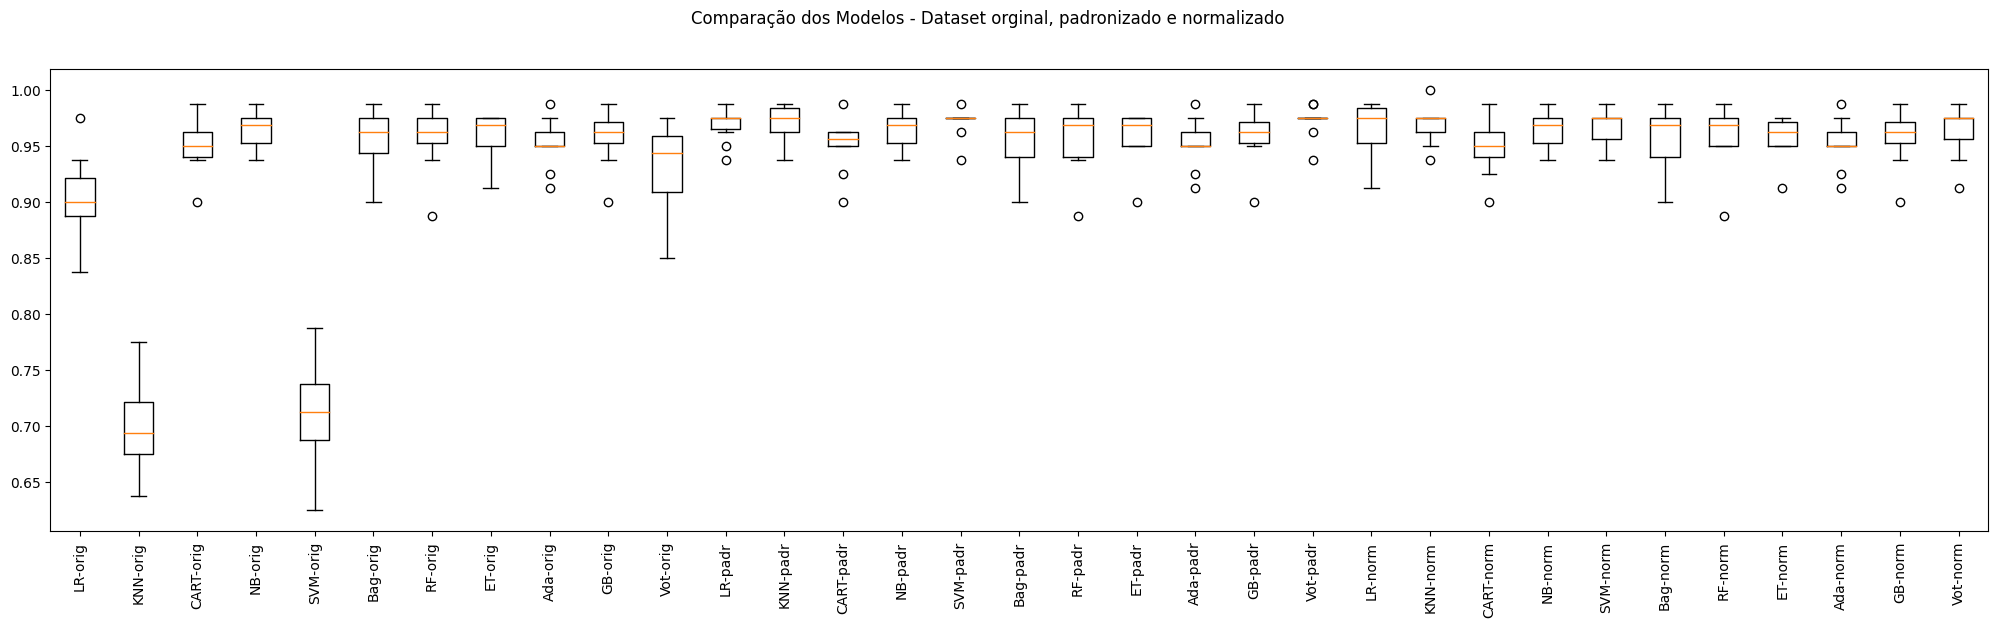

In [18]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

## **5.4.Otimização dos hiperparâmetros**



In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))